<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [0]:
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/common.py -O "common.py"
from common import *

--2020-01-27 19:10:55--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4100 (4.0K) [text/plain]
Saving to: ‘common.py’

common.py           100%[===================>]   4.00K  --.-KB/s    in 0s      

2020-01-27 19:10:56 (67.2 MB/s) - ‘common.py’ saved [4100/4100]



In [5]:
!wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/ar.py -O "ar.py"
from ar import *

--2020-01-27 19:11:11--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/ar.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1752 (1.7K) [text/plain]
Saving to: ‘ar.py’

ar.py               100%[===================>]   1.71K  --.-KB/s    in 0s      

2020-01-27 19:11:11 (345 MB/s) - ‘ar.py’ saved [1752/1752]



In [13]:
!wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/transformation.py -O "transformation.py"
from transformation import *

--2020-01-27 19:23:18--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/transformation.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1181 (1.2K) [text/plain]
Saving to: ‘transformation.py’

transformation.py   100%[===================>]   1.15K  --.-KB/s    in 0s      

2020-01-27 19:23:19 (52.0 MB/s) - ‘transformation.py’ saved [1181/1181]



In [6]:
!cp "./drive/My Drive/sudoku_acquisition_output.bz2" "./sudoku_acquisition_output.bz2"
acquisition_output = pd.read_pickle("./sudoku_acquisition_output.bz2")
acquisition_output

input_image  ... training
input_filename                                                                                         ...         
./v2_train/image169.jpg                             [[[164, 161, 118], [164, 161, 118], [164, 161,...  ...    False
./v2_train/image72.jpg                              [[[169, 168, 147], [169, 168, 147], [169, 168,...  ...    False
./v2_train/image1066.jpg                            [[[147, 143, 147], [147, 142, 146], [146, 142,...  ...     True
./v2_train/image1087.jpg                            [[[47, 41, 41], [47, 43, 42], [49, 45, 42], [4...  ...     True
./v2_train/image204.jpg                             [[[153, 146, 92], [154, 147, 95], [156, 148, 9...  ...    False
...                                                                                               ...  ...      ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[78, 76, 79], [77, 75, 78], [76, 74, 77], [7...  ...     True
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[133, 127, 105], [131, 125, 103], [131, 125,...  ...     True
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[50, 50, 50], [51, 51, 51], [50, 50, 50], [4...  ...     True
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[7, 3, 4], [8, 4, 5], [8, 4, 5], [8, 4, 5], ...  ...     True
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[123, 116, 98], [124, 117, 98], [123, 116, 9...  ...     True

[452 rows x 4 columns]

In [7]:
!cp "./drive/My Drive/sudoku_transformation_output.bz2" "./sudoku_transformation_output.bz2"
transformation_output = pd.read_pickle("./sudoku_transformation_output.bz2")
transformation_output

transform_contour_source  ...                                    transform_image
input_filename                                                                                        ...                                                   
./v2_train/image1066.jpg                              [[68, 279], [58, 754], [938, 755], [910, 277]]  ...  [[[81, 77, 76], [56, 51, 51], [51, 47, 46], [5...
./v2_train/image1087.jpg                            [[113, 157], [103, 750], [951, 736], [892, 158]]  ...  [[[115, 116, 111], [92, 92, 88], [96, 95, 91],...
./v2_train/image204.jpg                             [[195, 143], [190, 948], [816, 954], [799, 130]]  ...  [[[86, 81, 50], [83, 78, 48], [84, 79, 50], [8...
./v2_train/image1075.jpg                            [[116, 234], [111, 854], [959, 837], [914, 224]]  ...  [[[130, 129, 126], [89, 86, 83], [79, 72, 69],...
./v2_train/image1020.jpg                             [[104, 220], [85, 947], [982, 935], [990, 203]]  ...  [[[127, 132, 130], [129, 133, 132], [131, 135,...
...                                                                                              ...  ...                                                ...
./sudoku_dataset_1024/train_247994761_full/IMG_...   [[202, 362], [20, 754], [989, 744], [776, 350]]  ...  [[[109, 103, 87], [60, 54, 38], [60, 54, 38], ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[233, 327], [188, 746], [821, 741], [773, 320]]  ...  [[[85, 80, 84], [28, 23, 27], [41, 36, 40], [3...
./sudoku_dataset_1024/train_247994761_full/IMG_...   [[228, 366], [59, 725], [988, 723], [775, 358]]  ...  [[[52, 50, 55], [45, 43, 48], [46, 44, 49], [5...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[217, 308], [171, 759], [850, 751], [793, 303]]  ...  [[[83, 77, 63], [60, 54, 40], [61, 55, 41], [6...
./sudoku_dataset_1024/train_247994761_full/IMG_...   [[223, 385], [65, 713], [923, 699], [752, 367]]  ...  [[[46, 44, 47], [18, 16, 19], [24, 22, 25], [1...

[218 rows x 4 columns]

In [8]:
!cp "./drive/My Drive/sudoku_solve_output.bz2" "./sudoku_solve_output.bz2"
solve_output = pd.read_pickle("./sudoku_solve_output.bz2")
solve_output

solve_input                                       solve_output
input_filename                                                                                                                                          
./v2_train/image1066.jpg                            [[1, 0, 0, 0, 0, 0, 0, 0, 0], [2, 6, 0, 1, 5, ...  [[1, 4, 5, 2, 3, 9, 6, 8, 7], [2, 6, 8, 1, 5, ...
./v2_train/image1087.jpg                            [[0, 0, 2, 0, 0, 9, 1, 0, 5], [0, 8, 0, 7, 0, ...  [[6, 3, 2, 4, 8, 9, 1, 7, 5], [1, 8, 5, 7, 2, ...
./v2_train/image204.jpg                             [[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...  [[4, 1, 3, 6, 5, 8, 2, 9, 7], [5, 7, 6, 9, 4, ...
./v2_train/image1075.jpg                            [[3, 0, 0, 0, 9, 0, 0, 0, 2], [0, 1, 0, 0, 0, ...  [[3, 5, 7, 4, 9, 6, 8, 1, 2], [2, 1, 8, 3, 5, ...
./v2_train/image1020.jpg                            [[9, 7, 0, 0, 0, 2, 0, 0, 0], [1, 0, 8, 0, 0, ...  [[9, 7, 3, 4, 1, 2, 6, 5, 8], [1, 5, 8, 3, 7, ...
...                                                                                               ...                                                ...
./sudoku_dataset_1024/train_623574918_empty/IMG...  [[0, 2, 3, 0, 0, 4, 0, 0, 0], [8, 0, 5, 0, 0, ...  [[6, 2, 3, 5, 7, 4, 9, 1, 8], [8, 7, 5, 3, 9, ...
./sudoku_dataset_1024/train_623574918_empty/IMG...  [[0, 2, 3, 0, 0, 4, 0, 0, 0], [8, 0, 5, 0, 0, ...  [[6, 2, 3, 5, 7, 4, 9, 1, 8], [8, 7, 5, 3, 9, ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...  [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...  [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[2, 4, 7, 8, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...  [[2, 4, 7, 8, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...

[163 rows x 2 columns]

In [9]:
dataset = acquisition_output.join(transformation_output, how="inner").join(solve_output, how="inner")
dataset

input_image  ...                                       solve_output
input_filename                                                                                         ...                                                   
./v2_train/image1066.jpg                            [[[147, 143, 147], [147, 142, 146], [146, 142,...  ...  [[1, 4, 5, 2, 3, 9, 6, 8, 7], [2, 6, 8, 1, 5, ...
./v2_train/image1087.jpg                            [[[47, 41, 41], [47, 43, 42], [49, 45, 42], [4...  ...  [[6, 3, 2, 4, 8, 9, 1, 7, 5], [1, 8, 5, 7, 2, ...
./v2_train/image204.jpg                             [[[153, 146, 92], [154, 147, 95], [156, 148, 9...  ...  [[4, 1, 3, 6, 5, 8, 2, 9, 7], [5, 7, 6, 9, 4, ...
./v2_train/image1075.jpg                            [[[183, 171, 155], [182, 170, 154], [181, 169,...  ...  [[3, 5, 7, 4, 9, 6, 8, 1, 2], [2, 1, 8, 3, 5, ...
./v2_train/image1020.jpg                            [[[208, 210, 200], [210, 212, 202], [211, 212,...  ...  [[9, 7, 3, 4, 1, 2, 6, 5, 8], [1, 5, 8, 3, 7, ...
...                                                                                               ...  ...                                                ...
./sudoku_dataset_1024/train_623574918_empty/IMG...  [[[131, 113, 99], [131, 113, 99], [131, 113, 9...  ...  [[6, 2, 3, 5, 7, 4, 9, 1, 8], [8, 7, 5, 3, 9, ...
./sudoku_dataset_1024/train_623574918_empty/IMG...  [[[119, 100, 106], [120, 101, 107], [119, 101,...  ...  [[6, 2, 3, 5, 7, 4, 9, 1, 8], [8, 7, 5, 3, 9, ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[39, 41, 38], [47, 49, 46], [50, 52, 49], [4...  ...  [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[133, 127, 105], [131, 125, 103], [131, 125,...  ...  [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...
./sudoku_dataset_1024/train_247994761_full/IMG_...  [[[7, 3, 4], [8, 4, 5], [8, 4, 5], [8, 4, 5], ...  ...  [[2, 4, 7, 8, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...

[163 rows x 10 columns]

# Introduction

We are almost done at this point.
The only thing left to do is output the solution to the user.
For this we have decided to draw to solution directly on the input image in an *Artifical Reality* kind of way.

![alt text](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/documentation/ar.png?raw=true)

# Drawing on the transformed image

We start by drawing the solution onto the transformed image.
For the draw operations we have written the two specialized methods [`draw_digit(...)`](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/definitions/ar.py) and [`draw_solution(...)`](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/definitions/ar.py).
These internally call OpenCV's `putText(...)` method. 
The latter method specifically only draws a digit if the cell was previously empty.

In [0]:
dataset["ar_transform_image"] = [image.copy() for image in dataset["transform_image"]]
dataset["ar_transform_image"] = [draw_solution(x, y, z) for x, y, z in zip(dataset["ar_transform_image"], dataset["solve_input"], dataset["solve_output"])]

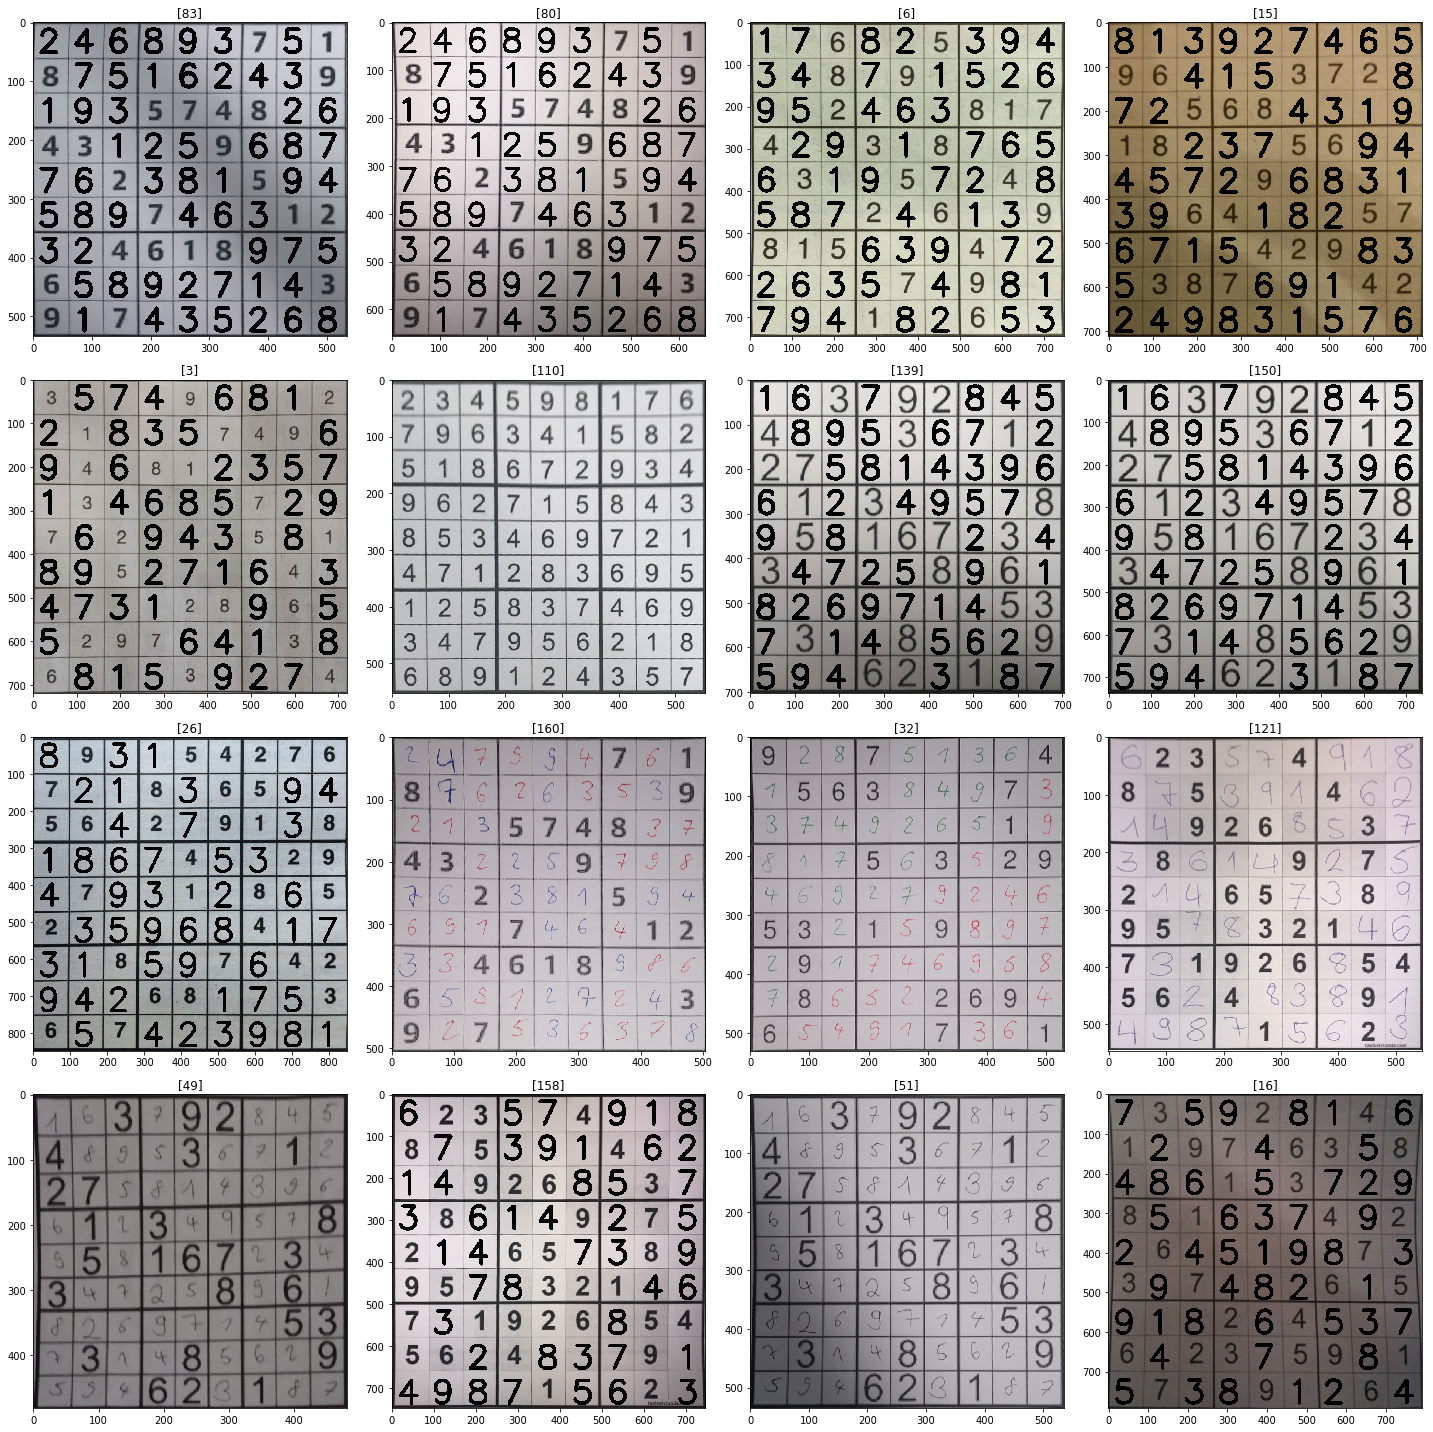

In [12]:
show_images(dataset["ar_transform_image"], n_samples=16)

# Overlaying the transformed image

The transformed image must now be put on top of the input image.
This basically works like already explained in the ["Transformation"](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_transformation.ipynb) stage.
At this point our job is easier:
We already now the source and destination points.
From there on the calculation of the transformation matrix is straightforward.

In [15]:
dataset["ar_transform_matrix"] = [get_transformation(dst, src) for src, dst in zip(dataset["transform_contour_source"], dataset["transform_contour_target"])]
dataset["ar_transform_matrix"]

input_filename
./v2_train/image1066.jpg                                                 [[1.2520517009973091, -0.01870228901131861, 68...
./v2_train/image1087.jpg                                                 [[1.143364005365472, -0.026503513452960464, 11...
./v2_train/image204.jpg                                                  [[0.8204164117820975, -0.016189970196198358, 1...
./v2_train/image1075.jpg                                                 [[1.1207354287376627, -0.016114386247543116, 1...
./v2_train/image1020.jpg                                                 [[1.085231682601707, -0.024750240460432366, 10...
                                                                                               ...                        
./sudoku_dataset_1024/train_623574918_empty/IMG_8762.JPG                 [[1.1129653930091428, -0.08244313387995866, 13...
./sudoku_dataset_1024/train_623574918_empty/IMG_8765.JPG                 [[0.574724986806956, -0.17567619089033693, 188...
.

To overlay the rendered image we have written a method [`overlay_transformed_image(...)`](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/definitions/ar.py) that applies a given transformation matrix to an foreground image and renders it on top of an existing background image.

In [0]:
dataset["ar_image"] = dataset["input_image"].copy() # overlay_transformed_image(...) works in-place, so we work on a copy
dataset["ar_image"] = [overlay_transformed_image(bg, fg, M) for bg, fg, M in zip(dataset["input_image"], dataset["ar_transform_image"], dataset["ar_transform_matrix"])]

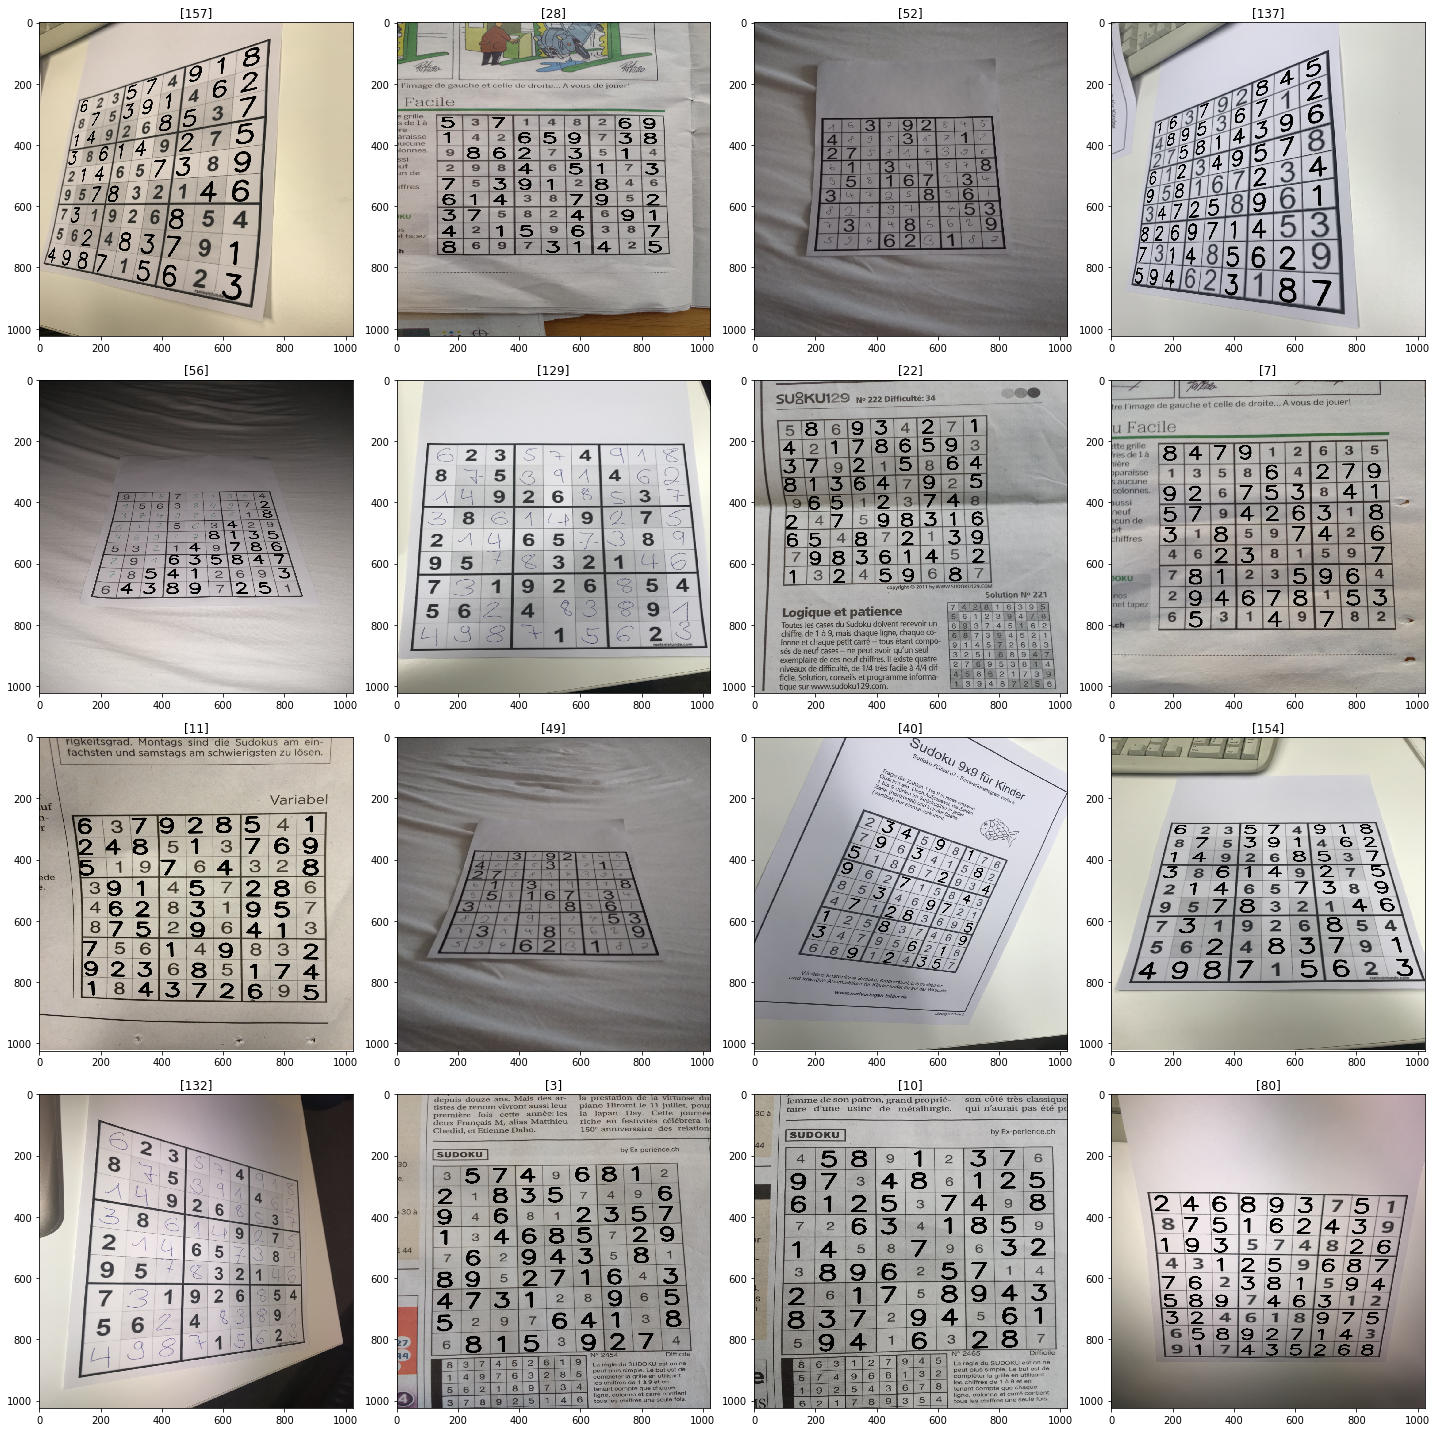

In [23]:
show_images(dataset["ar_image"], n_samples=16)

Finding out which digits were added by our application is left as an exercise for the reader.

# The End

Thank you for following us along our journey through the depths of media processing.
We hope you enjoyed your stay.